In [1]:
import pandas as pd

In [2]:
#1.adım: veri okuma
df_gender=pd.read_csv("resources/resources/gender_classification_v7.csv") 
df_gender.head(10) #ilk 10 satırını gösterir

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
5,1,13.0,6.8,1,1,1,1,Male
6,1,15.3,6.2,1,1,1,0,Male
7,0,13.0,5.2,0,0,0,0,Female
8,1,11.9,5.4,1,0,1,1,Female
9,1,12.1,5.4,0,0,0,0,Female


In [3]:
# dataframe hakkında genel bir bilgi sahibi olalım
df_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [4]:
#nan alan kontrolü yapalım
df_gender.isna()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4996,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False
4999,False,False,False,False,False,False,False,False


In [5]:
df_gender.isna().sum() #nan alan olmadığını gördük

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [6]:
#dataframe in matematiksel sonuçlarına bakalım
df_gender.describe().T
#min max değerler genel olarak yakın birbirlerine

,count,mean,std,min,25%,50%,75%,max
long_hair,5001.0,0.869626,0.336748,0.0,1.0,1.0,1.0,1.0
forehead_width_cm,5001.0,13.181484,1.107128,11.4,12.2,13.1,14.0,15.5
forehead_height_cm,5001.0,5.946311,0.541268,5.1,5.5,5.9,6.4,7.1
nose_wide,5001.0,0.493901,0.500013,0.0,0.0,0.0,1.0,1.0
nose_long,5001.0,0.507898,0.499988,0.0,0.0,1.0,1.0,1.0
lips_thin,5001.0,0.493101,0.500002,0.0,0.0,0.0,1.0,1.0
distance_nose_to_lip_long,5001.0,0.498900,0.500049,0.0,0.0,0.0,1.0,1.0


In [7]:
import seaborn as sns #İlgi çekici ve bilgilendirici grafikler çizmeyi sağlar
import matplotlib.pyplot as plt #2D grafikler çizmek için kullanılır

In [8]:
df_graph=pd.DataFrame({
    "Saç Uzunluğu":df_gender["long_hair"].value_counts().index,
    "Saç Uzunluğu Miktarı":df_gender["long_hair"].value_counts().values
})
df_graph #dengesiz veriseti : İki veri arasındaki farkın büyük olması durumuunda ortaya çıkar.
# ya 4349 u 652 yapacağız **burada veri kaybına uğrayabiliriz mantıklı değil**
#ya da 652 yi 4349 yapacağız

,Saç Uzunluğu,Saç Uzunluğu Miktarı
0,1,4349
1,0,652


<AxesSubplot:title={'center':'Saç Uzunluğu Dağılımı'}, xlabel='Saç Uzunluğu', ylabel='Saç Uzunluğu Miktarı'>

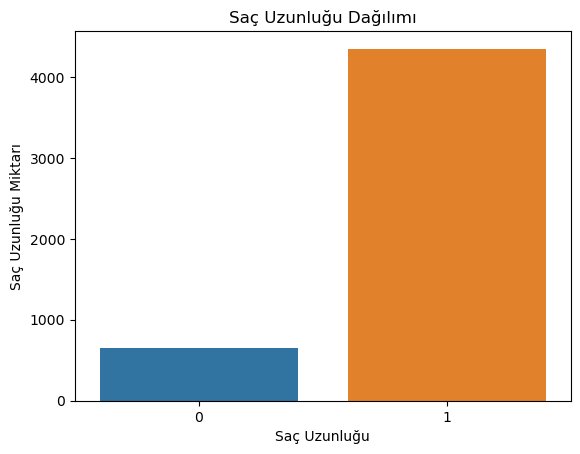

In [9]:
plt.title("Saç Uzunluğu Dağılımı") #grafik başlığı
sns.barplot(data=df_graph,x="Saç Uzunluğu",y="Saç Uzunluğu Miktarı")

In [10]:
#Sözel verilerimizi sayısal veriye çevirelim
df_gender["gender"].unique()
df_newGender=pd.get_dummies(df_gender.gender)
df_gender=df_gender.join(df_newGender)
df_gender

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,Female,Male
0,1,11.8,6.1,1,0,1,1,Male,0,1
1,0,14.0,5.4,0,0,1,0,Female,1,0
2,0,11.8,6.3,1,1,1,1,Male,0,1
3,0,14.4,6.1,0,1,1,1,Male,0,1
4,1,13.5,5.9,0,0,0,0,Female,1,0
...,...,...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female,1,0
4997,1,11.9,5.4,0,0,0,0,Female,1,0
4998,1,12.9,5.7,0,0,0,0,Female,1,0
4999,1,13.2,6.2,0,0,0,0,Female,1,0


In [11]:
df_gender.drop("gender",axis=1,inplace=True)
df_gender

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,Female,Male
0,1,11.8,6.1,1,0,1,1,0,1
1,0,14.0,5.4,0,0,1,0,1,0
2,0,11.8,6.3,1,1,1,1,0,1
3,0,14.4,6.1,0,1,1,1,0,1
4,1,13.5,5.9,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,1,0
4997,1,11.9,5.4,0,0,0,0,1,0
4998,1,12.9,5.7,0,0,0,0,1,0
4999,1,13.2,6.2,0,0,0,0,1,0


In [12]:
#X ve y değerlerimizi ayarlayalım
X=df_gender.drop("long_hair",axis=1)
y=df_gender["long_hair"]
df_gender=X.join(y)
df_gender

,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,Female,Male,long_hair
0,11.8,6.1,1,0,1,1,0,1,1
1,14.0,5.4,0,0,1,0,1,0,0
2,11.8,6.3,1,1,1,1,0,1,0
3,14.4,6.1,0,1,1,1,0,1,0
4,13.5,5.9,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
4996,13.6,5.1,0,0,0,0,1,0,1
4997,11.9,5.4,0,0,0,0,1,0,1
4998,12.9,5.7,0,0,0,0,1,0,1
4999,13.2,6.2,0,0,0,0,1,0,1


In [13]:
from imblearn.over_sampling import RandomOverSampler #varolan verileri kullanarak yeni veriler üretmemizi sağlar
from collections import Counter #adet miktarını veren python sınıfı

In [14]:
sampler=RandomOverSampler()
X_new,y_new=sampler.fit_resample(X,y) #verilerin sayılarındaki dengesizliği ortadan kaldırmaya yarar.Verileri birbirine uyumlu hale getirir.
print(f"Eski Durum: {Counter(y)}")
print(f"Yeni Durum: {Counter(y_new)}")

Eski Durum: Counter({1: 4349, 0: 652})
Yeni Durum: Counter({1: 4349, 0: 4349})


<AxesSubplot:>

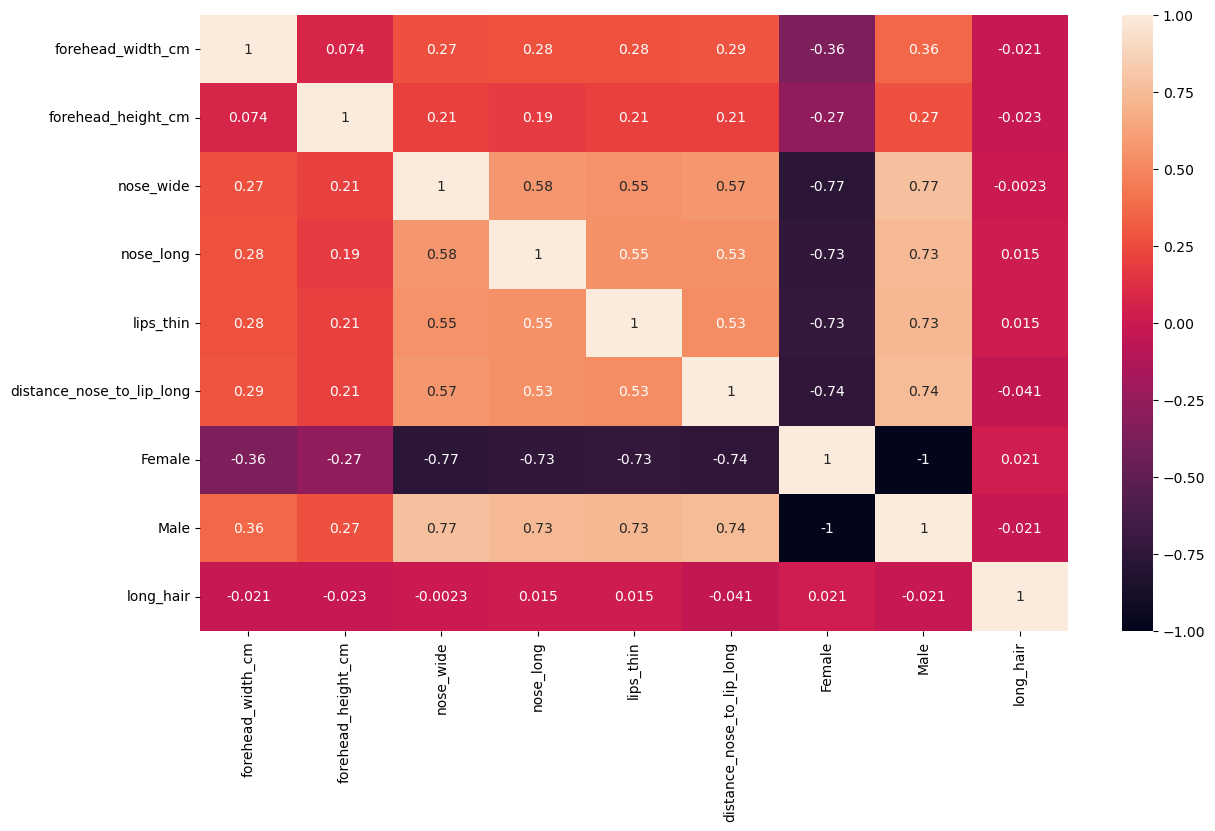

In [15]:
#korelasyon durumlarını sıcaklık haritasıyla gösterelim
df_gender=X_new.join(y_new) 
plt.figure(figsize=(14,8))
sns.heatmap(df_gender.corr(),annot=True)

In [16]:
from sklearn.model_selection import train_test_split
#yeni verileri train ve test olarak bölmemizi sağlar
#train: modeli eğitmek için kullanılan orijinal verilerin alt kümesidir
#test: modelin doğruluğunu kontrol etmede kullandığımız veri kümesidir.

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.2,random_state=42)
#test_size: verilerin yüzde kaçının test verisi olarak kullanılacağını belirlememizi sağlar

In [18]:
from sklearn.tree import DecisionTreeClassifier #sınıflandırma yapmada kullanıyoruz
from sklearn.metrics import accuracy_score,confusion_matrix
#accuracy_score: sınıflandırmada alt küme doğruluğunu hesaplar
#confusion matrix: bir sınıflandırmanın doğruluğunu değerlendirmek için karışıklık matrisi yöntemi kullanılır.

In [19]:
model_tree=DecisionTreeClassifier() #modelimizde DecisionTreeClassifier metodunun özelliklerini kullanabilmeyi sağladık
model_tree.fit(X_train,y_train) #model_tree yi eğittik

DecisionTreeClassifier()

In [20]:
print(f"Train Accuracy Score={accuracy_score(y_train,model_tree.predict(X_train))}")
#train verilerle eğittiğimiz modeldeki verileri karşılaştırıp modelimizin doğruluk oranını veriyor
print(f"Test Accuracy Score={accuracy_score(y_test,model_tree.predict(X_test))}")
#test verilerle eğittiğimiz modeldeki test verileri karşılaştırıp modelin doğruluk oranını veriyor

Train Accuracy Score=0.9192296636964645
Test Accuracy Score=0.882183908045977


In [21]:
#Çıkan veriler çok da yakın değil, karar ağacına bakalım
from sklearn import tree #karar ağcını çizebilmek için 

[Text(0.6689668045303954, 0.9821428571428571, 'X[0] <= 15.45\ngini = 0.5\nsamples = 6958\nvalue = [3475, 3483]'),
 Text(0.3490095584278794, 0.9464285714285714, 'X[1] <= 5.35\ngini = 0.5\nsamples = 6826\nvalue = [3383, 3443]'),
 Text(0.07396391187925998, 0.9107142857142857, 'X[0] <= 12.95\ngini = 0.493\nsamples = 1065\nvalue = [469, 596]'),
 Text(0.026442307692307692, 0.875, 'X[1] <= 5.15\ngini = 0.46\nsamples = 457\nvalue = [164, 293]'),
 Text(0.008519961051606621, 0.8392857142857143, 'X[0] <= 11.75\ngini = 0.364\nsamples = 134\nvalue = [32, 102]'),
 Text(0.007546251217137293, 0.8035714285714286, 'gini = 0.0\nsamples = 27\nvalue = [0, 27]'),
 Text(0.00949367088607595, 0.8035714285714286, 'X[0] <= 12.05\ngini = 0.419\nsamples = 107\nvalue = [32, 75]'),
 Text(0.004868549172346641, 0.7678571428571429, 'X[5] <= 0.5\ngini = 0.496\nsamples = 46\nvalue = [25, 21]'),
 Text(0.0038948393378773127, 0.7321428571428571, 'X[2] <= 0.5\ngini = 0.45\nsamples = 38\nvalue = [25, 13]'),
 Text(0.0019474196

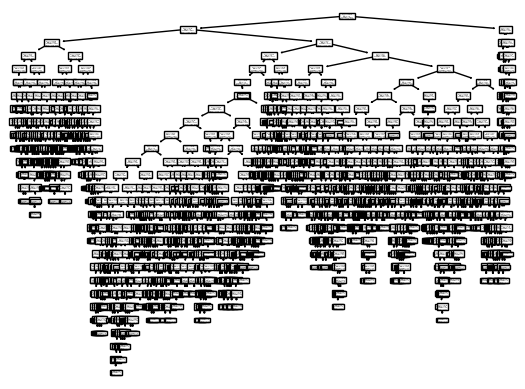

In [22]:
tree.plot_tree(model_tree) #karar ağacını çizer.
#karar ağacı okunamadığından prune(budama) yapacağız

In [23]:
#ccp_alpha: min maliyet karmaşıklık budaması için kullanılan karmaşıklık parametresi
#en büyük maliyet karmaşıklığına sahip olan ve ccp_alpha dan küçük olan alt ağaç seçilecektir
#prune (budama) işlemi default olarak yapılmaz

In [24]:
path=model_tree.cost_complexity_pruning_path(X_train,y_train) #herbir dallanma için kullanılan alpha değerlerini aldık
alphas=path["ccp_alphas"]

In [25]:
accuracy_train,accuracy_test=[],[]
for i in alphas:
    model_prune=DecisionTreeClassifier(ccp_alpha=i)
    #prune için gerekli ccp_alpha parametresine eğitme sınıfının kurucusunu aldı
    model_prune.fit(X_train,y_train)
    #prune edilmiş modeli eğittik
    y_train_pred=model_prune.predict(X_train)
    #X_train verileriyle y_train i tahmin ettiriyor
    y_test_pred=model_prune.predict(X_test)
    #X_test verileriyle y_test i tahmin ettiriyor
    accuracy_train.append(accuracy_score(y_train,y_train_pred)) #bu dizilerin içerisine doğruluk skorlarını kaydettiriyoruz
    accuracy_test.append(accuracy_score(y_test,y_test_pred))

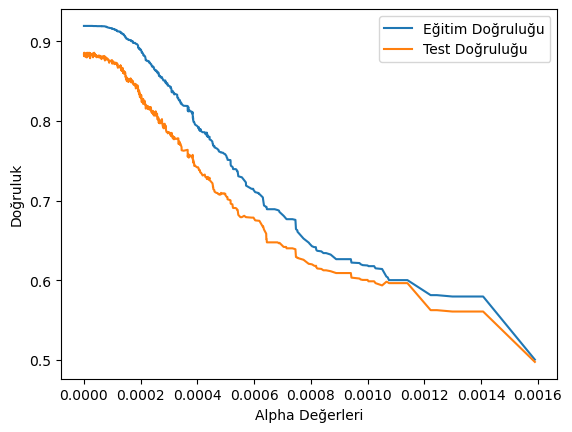

In [27]:
#.lineplot ile eğitim ve test verilerinin doğruluk dizilerinin çizgi grafiğini çizdiriyoruz
sns.lineplot(y=accuracy_train,x=alphas,label="Eğitim Doğruluğu")
sns.lineplot(y=accuracy_test,x=alphas,label="Test Doğruluğu")
#x ve ye eksenlerinin isimlerini değiştirmek için .xlabel() ve .ylabel kullanırız.
plt.xlabel("Alpha Değerleri")
plt.ylabel("Doğruluk")
plt.xticks()
plt.show()
#İki değerin paralel olmaya başladığı nokta ccp_alpha değerimizdir

In [51]:
model_tree_new=DecisionTreeClassifier(ccp_alpha=0.0012)
model_tree_new.fit(X_train,y_train) #modelimizi train verilerle eğittik

DecisionTreeClassifier(ccp_alpha=0.0012)

In [52]:
print(f"Train Accuracy Score= {accuracy_score(y_train,model_tree_new.predict(X_train))}")
print(f"Test Accuracy Score= {accuracy_score(y_test,model_tree_new.predict(X_test))}")
#iki sonuç birbirine yakın ve gerçekçi çıktığından aşırı öğrenme yok deriz

Train Accuracy Score= 0.6003161828111526
Test Accuracy Score= 0.596551724137931


[Text(0.39473684210526316, 0.95, 'X[0] <= 15.45\ngini = 0.5\nsamples = 6958\nvalue = [3475, 3483]'),
 Text(0.34210526315789475, 0.85, 'X[1] <= 5.35\ngini = 0.5\nsamples = 6826\nvalue = [3383, 3443]'),
 Text(0.10526315789473684, 0.75, 'X[0] <= 12.95\ngini = 0.493\nsamples = 1065\nvalue = [469, 596]'),
 Text(0.05263157894736842, 0.65, 'gini = 0.46\nsamples = 457\nvalue = [164, 293]'),
 Text(0.15789473684210525, 0.65, 'X[0] <= 13.55\ngini = 0.5\nsamples = 608\nvalue = [305, 303]'),
 Text(0.10526315789473684, 0.55, 'X[0] <= 13.45\ngini = 0.471\nsamples = 245\nvalue = [152, 93]'),
 Text(0.05263157894736842, 0.45, 'gini = 0.495\nsamples = 191\nvalue = [105, 86]'),
 Text(0.15789473684210525, 0.45, 'gini = 0.226\nsamples = 54\nvalue = [47, 7]'),
 Text(0.21052631578947367, 0.55, 'gini = 0.488\nsamples = 363\nvalue = [153, 210]'),
 Text(0.5789473684210527, 0.75, 'X[5] <= 0.5\ngini = 0.5\nsamples = 5761\nvalue = [2914, 2847]'),
 Text(0.42105263157894735, 0.65, 'X[0] <= 14.15\ngini = 0.5\nsamples 

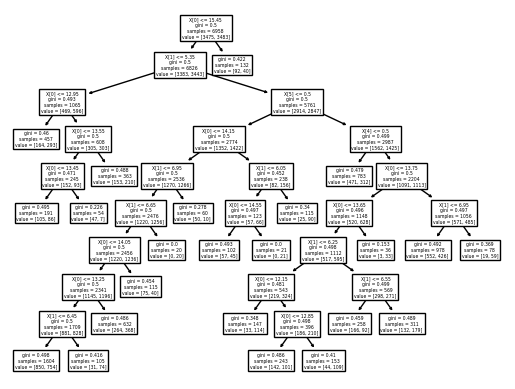

In [53]:
tree.plot_tree(model_tree_new)
#yeni modelimizin karar ağacını çizdirdik. Aşırı öğrenme durmunu ortadan kaldırdık ve daha okunaklı bir ağaç elde etmiş olduk

<AxesSubplot:>

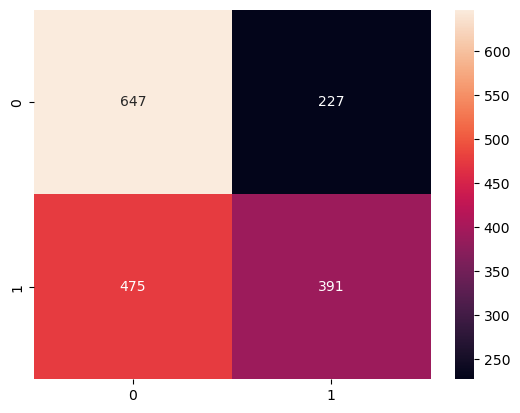

In [55]:
sns.heatmap(confusion_matrix(y_test,model_tree_new.predict(X_test)),annot=True,fmt='g') 
#fmt=g sayıları daha düzgün şekilde gösterir
#sol yukarıdan sağ aşağıya olan köşegen doğru tahmin, diğer köşe yanlış tahminleri gösterir
#y_test de bulunan gerçek değerlerle y_test modelimizi karşılaştırdı

In [56]:
len(y_test)

1740

In [57]:
(647+391)/1740 #doğru tahmin olan köşeleri toplayıp tüm verilerin toplamına böldük 

0.596551724137931

In [58]:
print(f"Test Accuracy Score= {accuracy_score(y_test,model_tree_new.predict(X_test))}")

Test Accuracy Score= 0.596551724137931


In [61]:
model_tree_new.predict(X_test) #model_tree_new i X_test e göre tahmin ediyor

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [62]:
y_test #gerçek veriler

7581    0
3909    1
6560    0
675     1
1253    1
       ..
5224    0
6729    0
7563    0
26      1
6583    0
Name: long_hair, Length: 1740, dtype: int64